<a href="https://colab.research.google.com/github/cecilia-wanja/Project-on-Financial-services-used-across-East-Africa/blob/master/Cecilia_Wanja_Independent_Project_week1_DataScience_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Data visualisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas_profiling as pp

In [28]:
#Looking at the first few rows
country=pd.read_csv("/content/country.csv")
country.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [29]:
#Getting the column names
country.columns.values

array(['country', 'year', 'uniqueid', 'Has a Bank account',
       'Type of Location', 'Cell Phone Access', 'household_size',
       'Respondent Age', 'gender_of_respondent', 'The relathip with head',
       'marital_status', 'Level of Educuation', 'Type of Job'],
      dtype=object)

In [30]:
#getting the statistical values in the numeric columns
country.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [31]:
#getting to know the information
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


The total number of entries are 23524.
Columns such as:country,Has a bank account,Type of location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head ,marital_status ,Level of Educuation,Type of Job .
have missing values





# **CLEANING DATA**

In [32]:
#Identifying missing data
country.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

There are null values in all the columns except :year and uniqueid

In [33]:
#Dealing with missing values

finance=country.dropna()
finance.isnull().any()

country                   False
year                      False
uniqueid                  False
Has a Bank account        False
Type of Location          False
Cell Phone Access         False
household_size            False
Respondent Age            False
gender_of_respondent      False
The relathip with head    False
marital_status            False
Level of Educuation       False
Type of Job               False
dtype: bool

In [34]:
pp.ProfileReport(finance)

Number of variables,14
Number of observations,23343
Total Missing (%),0.0%
Total size in memory,2.5 MiB
Average record size in memory,112.0 B
Numeric,4
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [0]:
#dealing with outliers
#I decided to retain the outliers as well as anomalies in the data as they proved to be useful


Processing columns

In [41]:
#dropped the unnecessary column
finance.drop(["uniqueid"],axis=1,inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [42]:
finance.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [44]:
#checking for unexpected datatypes
finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 12 columns):
country                   23343 non-null object
year                      23343 non-null int64
Has a Bank account        23343 non-null object
Type of Location          23343 non-null object
Cell Phone Access         23343 non-null object
household_size            23343 non-null float64
Respondent Age            23343 non-null float64
gender_of_respondent      23343 non-null object
The relathip with head    23343 non-null object
marital_status            23343 non-null object
Level of Educuation       23343 non-null object
Type of Job               23343 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 2.9+ MB


In [71]:
#resolving anomalies
finance.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [78]:

#finance

ind = finance[finance['year'] > 2018].index
ind
finance = finance.drop(ind)
finance['year'].unique()

array([2018, 2016, 2017])

In [106]:
#Renaming the columns for uniformity
finance1 = finance.rename(columns={"country":"Country","year":"Year","Has a Bank account":"Bank_account","Type of Location":"Location","Cell Phone Access":"Cell_phone_access","Respondent Age":"Age","The relathip with head":"Relationship","Level of Educuation":"Education_level","Type of Job":"Job_type"})
finance1.head()

,Country,Year,Bank_account,Location,Cell_phone_access,household_size,Age,gender_of_respondent,Relationship,marital_status,Education_level,Job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# **UNIVARIATE ANALYSIS**

In [107]:

finance1.describe()

,Year,household_size,Age
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [109]:
finance1["Country"].mode()

0    Rwanda
dtype: object

In [111]:
finance1["Year"].mode()

0    2016
dtype: int64

In [0]:
finance1["Bank_account"].mode()

0    No
dtype: object

In [112]:
finance1["household_size"].mode()

0    2.0
dtype: float64

In [113]:
finance1["Age"].mode()

0    30.0
dtype: float64

In [114]:
finance1["gender_of_respondent"].mode()

0    Female
dtype: object

In [115]:
finance1["Relationship"].mode()

0    Head of Household
dtype: object

In [116]:
finance1["marital_status"].mode()

0    Married/Living together
dtype: object

In [118]:
finance1["Education_level"].mode()

0    Primary education
dtype: object

In [120]:
finance1["Job_type"].mode()

0    Self employed
dtype: object

Measures of Dispersion

In [94]:
#variance of the data
finance.var()

year                0.721031
household_size      5.204214
Respondent Age    272.907247
dtype: float64

In [121]:
#range of household size column
maxhousehold = finance1.household_size.max()
minhousehold = finance1.household_size.min()
range = maxhousehold - minhousehold
range

21.0

In [122]:
#range of Age column
maxage = finance1.Age.max()
minage = finance1.Age.min()
range = maxage - minage
range

84.0

In [123]:
#skewness
finance1.skew()

Year              0.042833
household_size    0.974183
Age               0.840615
dtype: float64

In [124]:
#kurtosis of the data
finance1.kurt()

Year             -1.611829
household_size    1.153836
Age               0.098268
dtype: float64

In [130]:
finance1.Age.unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,  94.,
        87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

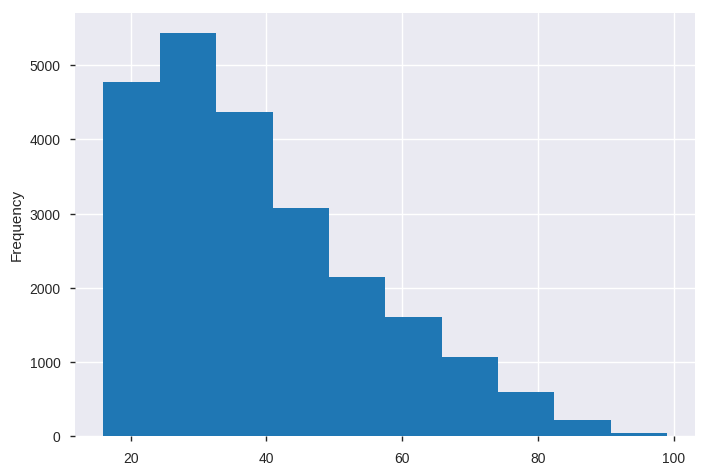

In [135]:
#Creating a histogram from the dataset
finance1[finance1['Age'] < 100]['Age'].plot.hist()

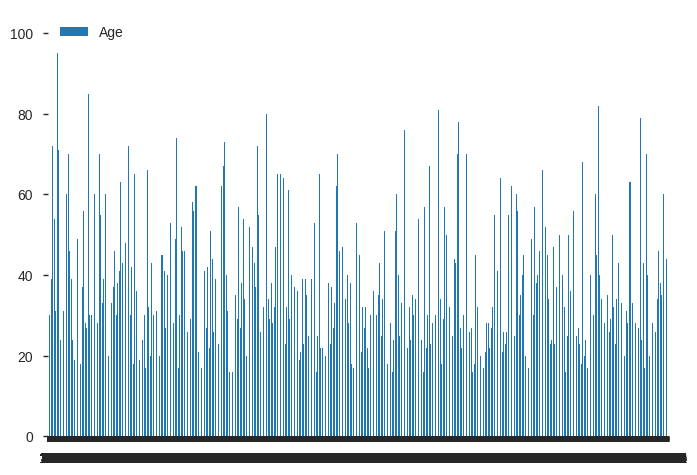

In [137]:
#Creating a bar chart
bar = finance1.plot.bar(y='Age', rot=0)
bar

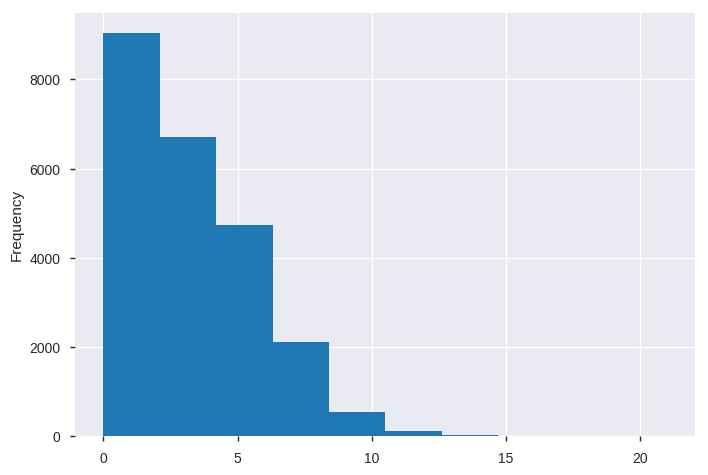

In [138]:
#histogram for household size
finance1[finance1['household_size'] < 100]['household_size'].plot.hist()

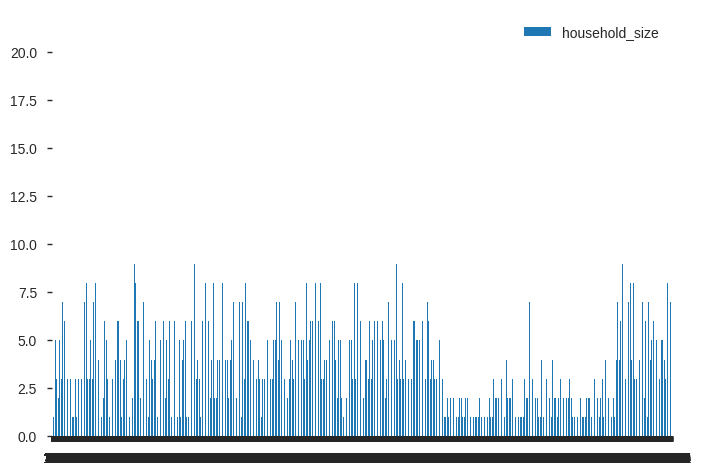

In [139]:
#bar chart for household size column
bar = finance1.plot.bar(y='household_size', rot=0)
bar

TypeError: ignored

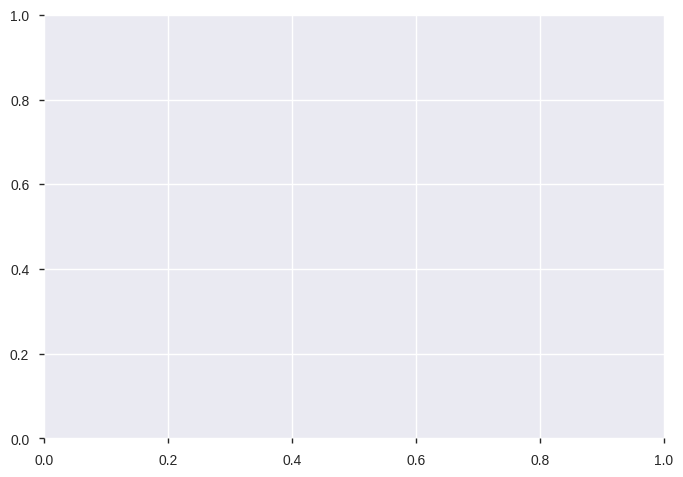

In [146]:
finance1.Age = finance1.Age.astype(float)
sns.boxplot(["household_size"])
plt.show() 
           